In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
file_path = '../../data/Prac2/vidu4_lin_reg.txt'
df = pd.read_csv(file_path, sep=' ')
df = df.drop('ID', axis=1)
df.head()

,TUOI,BMI,HA,GLUCOSE,CHOLESTEROL,BEDAYNTM
0,56,21,160,14.0,6.00,1.95
1,76,18,150,12.0,4.97,1.33
2,63,16,160,4.4,6.39,0.83
3,78,20,100,4.0,7.00,2.00
4,87,20,110,4.6,4.10,1.30


In [37]:
X = df.drop('BEDAYNTM', axis=1)
y = df['BEDAYNTM']

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
transformed = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])
transformed.shape


(100, 2)

In [39]:
transformed.head()

,PC1,PC2
0,19.599753,-4.400157
1,7.530437,14.350353
2,18.805429,2.219338
3,-42.381665,10.886906
4,-33.396946,20.842330


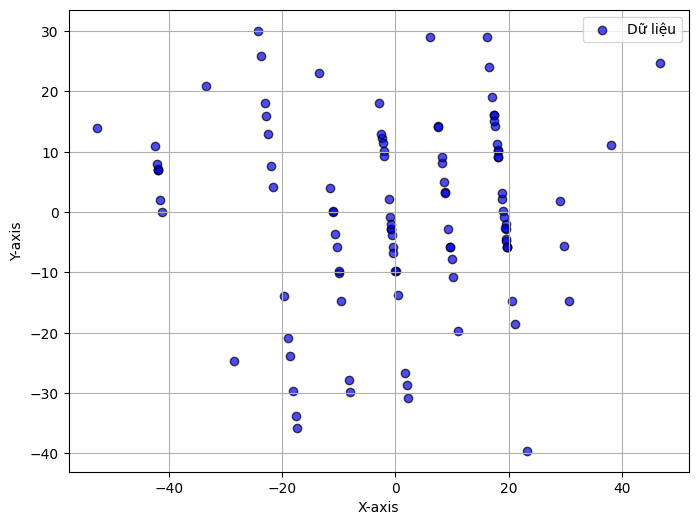

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed["PC1"], transformed["PC2"], color='blue', alpha=0.7, edgecolors='k', label="Dữ liệu")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linR = LinearRegression()

linR.fit(X_train, y_train)
y_pred = linR.predict(X_test)
print(linR.score(X_test, y_test))
# print(mean_squared_error(y_test, y_pred))
y_pred

0.139886628276073


array([0.9166755 , 0.94909308, 0.98246474, 0.74463805, 1.11737829,
       1.26907756, 1.06224428, 1.23822755, 1.15607301, 0.889008  ,
       1.24964926, 1.16229533, 0.77599632, 1.0979777 , 1.07620652,
       1.19459133, 1.08627558, 0.99364958, 1.13972887, 0.6374861 ])

In [70]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(transformed, y, test_size=0.2, random_state=1)

linR.fit(X_train_pca, y_train)
print(linR.score(X_test_pca, y_test))
y_pred_pca = linR.predict(X_test_pca)
# print(mean_squared_error(y_test, y_pred))
y_pred_pca

0.13446249084295037


array([0.91934826, 0.99583556, 1.01821277, 0.77663454, 1.04125017,
       1.12249887, 1.06189476, 1.19805524, 1.11759982, 0.89818118,
       1.21641767, 1.1726335 , 0.76776539, 1.06261411, 1.17161819,
       1.19333129, 1.11919497, 1.06207728, 1.19317855, 0.6559833 ])

**R² trước khi giảm chiều dữ liệu (0.1399)**

* Giá trị R² = 0.1399 cho thấy mô hình hồi quy tuyến tính chỉ giải thích được khoảng 13.99% phương sai của dữ liệu.
* Đây là một kết quả khá thấp, cho thấy mô hình chưa thực sự phù hợp với dữ liệu và có thể còn nhiều biến chưa được khai thác hiệu quả.

**R² sau khi giảm chiều bằng PCA (0.1345)**

* Sau khi giảm số chiều dữ liệu bằng PCA, giá trị R² giảm xuống còn 0.1345.
* Điều này cho thấy việc giảm chiều có ảnh hưởng tiêu cực đến độ chính xác của mô hình.
* Nguyên nhân có thể là do PCA đã loại bỏ một số thông tin quan trọng, làm mất đi khả năng dự đoán của mô hình.